**Exploring the possible relationship between Cosine Similarity Difference and the Frequency of Correct Text Sentiment Predictions**

Cosine Similarity is a similarity metric between vectors. In this case, it is the similarity of positive & negative text sentiments to base positive & negative words.

```
self.ref_pos = ['love', 'best', 'beautiful', 'great', 'cool', 'awesome', 'wonderful', 'brilliant', 'excellent', 'fantastic']

self.ref_neg = ['bad', 'worst', 'stupid', 'disappointing', 'terrible', 'rubbish', 'boring', 'awful', 'unwatchable', 'awkward']
```

cos_sim_good & cos_sim_bad values are then calculated for every sentence.

```
cos_sim_bad - cos_sim_good < -0.5 # predicted positive
cos_sim_bad * self.neg_coefficient <= cos_sim_good * self.pos_coefficient # predicted positive

cos_sim_bad - cos_sim_good > 0.5 # predicted negative
cos_sim_bad * self.neg_coefficient >= cos_sim_good * self.pos_coefficient # predicted negative
```

Text sentiment predictions are made based on the above conditions.

The cosine similarity difference for every sentence is then calculated as such:
*cosine similarity difference = cos_sim_good - cos_sim_bad*

In [125]:
import pandas as pd

pseudo_dataset = pd.read_csv('pseudo_dataset.csv')
pseudo_dataset.head()

,predictions,truth,cosine similarity difference,correct guess
0,1,0,0.046821,0
1,1,1,0.042952,1
2,1,1,0.001481,1
3,1,1,0.040193,1
4,1,0,0.001362,0


In [126]:
pseudo_dataset.shape

(346000, 4)

In [127]:
cg_0 = pseudo_dataset.loc[pseudo_dataset['correct guess'] == 0]
cg_0.shape

(82870, 4)

In [128]:
cg_1 = pseudo_dataset.loc[pseudo_dataset['correct guess'] == 1]
cg_1.shape

(263130, 4)

In [129]:
cg_1 = cg_1.sample(n = 82870)
cg_1.shape

(82870, 4)

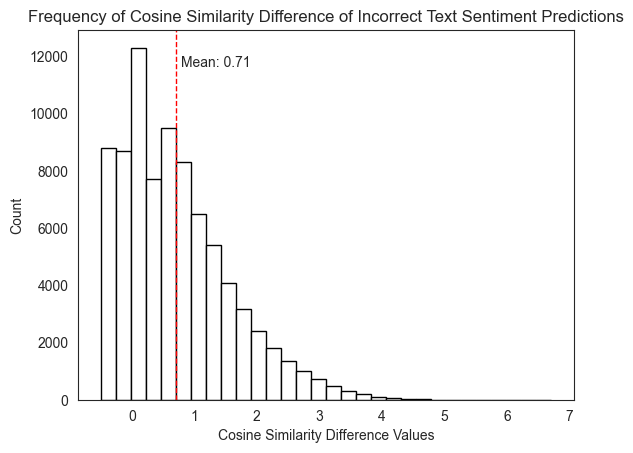

In [130]:
import matplotlib.pyplot as plt

plt.hist(cg_0['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of Incorrect Text Sentiment Predictions")
plt.axvline(cg_0['cosine similarity difference'].mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_0['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_0['cosine similarity difference'].mean()))

plt.show()

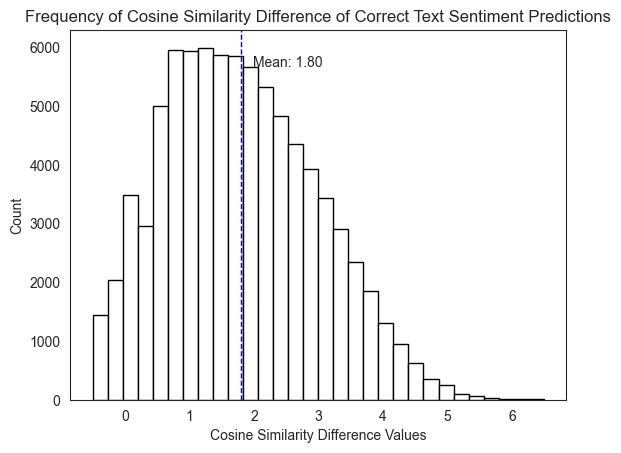

In [131]:
plt.hist(cg_1['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of Correct Text Sentiment Predictions")
plt.axvline(cg_1['cosine similarity difference'].mean(), color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_1['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_1['cosine similarity difference'].mean()))

plt.show()

In [132]:
pseudo_dataset_reduced = cg_0.append(cg_1)
pseudo_dataset_reduced.shape

(165740, 4)

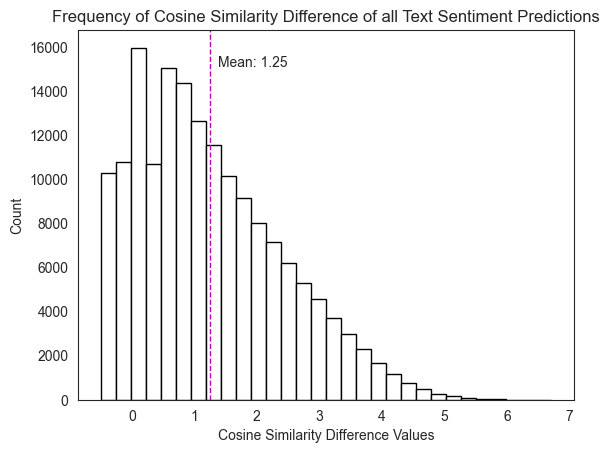

In [133]:
plt.hist(pseudo_dataset_reduced['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of all Text Sentiment Predictions")
plt.axvline(pseudo_dataset_reduced['cosine similarity difference'].mean(), color='m', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pseudo_dataset_reduced['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(pseudo_dataset_reduced['cosine similarity difference'].mean()))

plt.show()

**Normalisation of Cosine Similarity Difference & Correct Guess data**

Upon normalisation of data by dividing cos_sim_good and cos_sim_bad by k_cur which determines how many positive and negative reference words are used, 

we get a more symmetric normal distribution of data points for the entire dataset.

In [134]:
import pandas as pd

pseudo_dataset_normalized = pd.read_csv('pseudo_dataset_normalized.csv')
pseudo_dataset_normalized.head()

,predictions,truth,cosine similarity difference,correct guess
0,1,0,0.027175,0
1,1,1,0.023638,1
2,1,1,0.023129,1
3,1,1,0.024362,1
4,1,0,0.021526,0


In [135]:
pseudo_dataset_normalized.shape

(386000, 4)

In [136]:
cg_0_normalized = pseudo_dataset_normalized.loc[pseudo_dataset_normalized['correct guess'] == 0]
cg_0_normalized.shape

(175771, 4)

In [137]:
cg_1_normalized = pseudo_dataset_normalized.loc[pseudo_dataset_normalized['correct guess'] == 1]
cg_1_normalized.shape

(210229, 4)

In [138]:
cg_1_normalized = cg_1_normalized.sample(n = 175771)
cg_1_normalized.shape

(175771, 4)

In [139]:
pseudo_dataset_normalized_reduced = cg_0_normalized.append(cg_1_normalized)
pseudo_dataset_normalized_reduced.shape

(351542, 4)

**Hypothesis Testing**

**Two-Sample t-Test** is a statistical hypothesis test used to determine if the population means of two data groups are equal or not.

H0: There exists no statistically-signficant difference between the mean cosine similarity difference values and the correct & incorrect text sentiment predictions.

HA: There exists a statistically-signficant difference between the mean cosine similarity difference values and the correct & incorrect text sentiment predictions.

**Creating Data Groups** (arrays of cosine similarity difference values for correctly-predicted & incorrectly-predicted text sentiments)

In [140]:
csd_for_1 = cg_1_normalized['cosine similarity difference']
csd_for_0 = cg_0_normalized['cosine similarity difference']

import numpy as np
csd_for_1 = csd_for_1.to_numpy() # converting series to numpy array for hypothesis test
csd_for_0 = csd_for_0.to_numpy()
type(csd_for_1) # checking...

numpy.ndarray

**Checking for Homogeneity** (similar sample variances of data groups)

In [141]:
print("Variances of Data Groups:", round(np.var(csd_for_1), 3), "&", round(np.var(csd_for_0), 3))

Variances of Data Groups: 0.036 & 0.032


Since the values are very similar, we can assume equal variances for groups and carry out the Two Sample t-Test instead of Welch's t-test.

In [142]:
import scipy.stats as stats
print(stats.ttest_ind(csd_for_1, csd_for_0, equal_var = True))

Ttest_indResult(statistic=468.45746011393913, pvalue=0.0)


Since the p-value is a lot smaller than significance level 0.05, we can reject the null hypothesis.

*There exists a statistically-signficant difference between the mean cosine similarity difference values and the correct & incorrect text sentiment predictions.*

**Plotting Histograms**

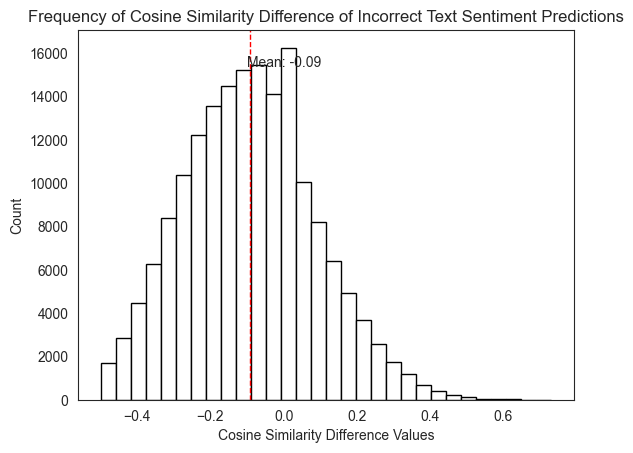

In [143]:
plt.hist(cg_0_normalized['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of Incorrect Text Sentiment Predictions")
plt.axvline(cg_0_normalized['cosine similarity difference'].mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_0_normalized['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_0_normalized['cosine similarity difference'].mean()))

plt.show()

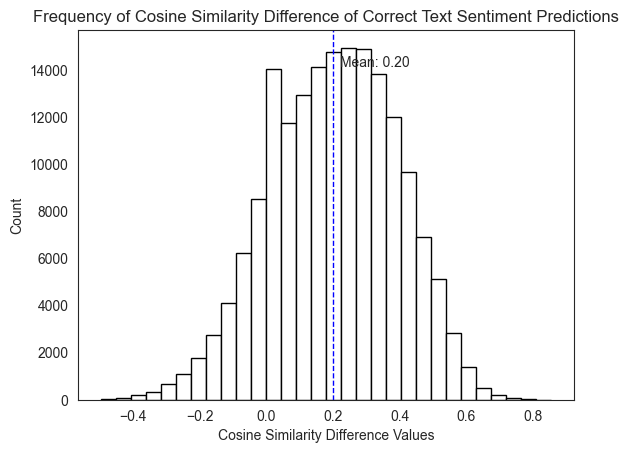

In [144]:
plt.hist(cg_1_normalized['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of Correct Text Sentiment Predictions")
plt.axvline(cg_1_normalized['cosine similarity difference'].mean(), color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(cg_1_normalized['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(cg_1_normalized['cosine similarity difference'].mean()))

plt.show()

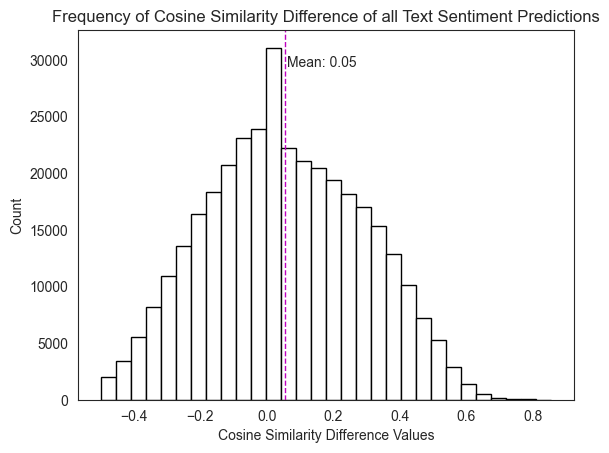

In [145]:
plt.hist(pseudo_dataset_normalized_reduced['cosine similarity difference'], bins=30, color='w', edgecolor='k')

plt.xlabel("Cosine Similarity Difference Values")
plt.ylabel("Count")
plt.title("Frequency of Cosine Similarity Difference of all Text Sentiment Predictions")
plt.axvline(pseudo_dataset_normalized_reduced['cosine similarity difference'].mean(), color='m', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pseudo_dataset_normalized_reduced['cosine similarity difference'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(pseudo_dataset_normalized_reduced['cosine similarity difference'].mean()))

plt.show()

**Kernel Density Estimation** is a non-parametric technique used to estimate the PDF of a random variable. Here, for any cosine similarity difference value (continuous random variable), we can get an estimate of its corresponding frequencies of correctly-predicted sentiments.

C:\Users\Sam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


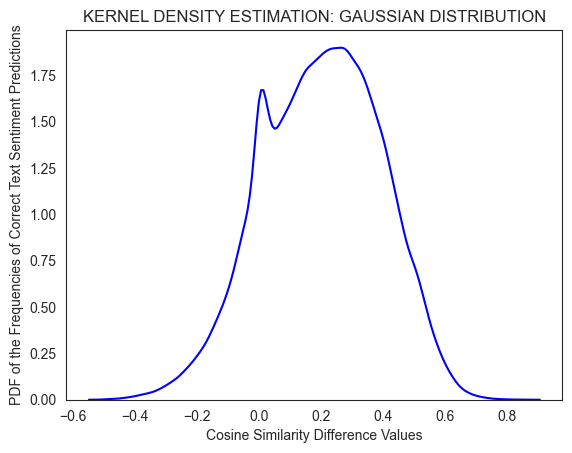

In [146]:
import seaborn as sns

sns.set_style('white')
ax = sns.distplot(cg_1_normalized['cosine similarity difference'],
                  bins=30,
                  kde= True,
                  color='b',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Cosine Similarity Difference Values', ylabel='PDF of the Frequencies of Correct Text Sentiment Predictions', title='KERNEL DENSITY ESTIMATION: GAUSSIAN DISTRIBUTION')
 
plt.show()

**PDF of Gaussian Distribution: 1/(sqrt(2 * pi * sigma^2)) * exp(-(x-mu)^2/(2*sigma^2))**

*where sigma = standard deviation & mu = mean*

In [147]:
print("Standard Deviation of the Estimated Gaussian Distribution is", round(cg_1_normalized['cosine similarity difference'].std(), 2))

Standard Deviation of the Estimated Gaussian Distribution is 0.19


In [148]:
print("Mean of the Estimated Gaussian Distribution is", round(cg_1_normalized['cosine similarity difference'].mean(), 2))

Mean of the Estimated Gaussian Distribution is 0.2


**Calculating the Confidence Intervals for Correct Text Sentiment Predictions**

*Values needed:*

cg1_mean = 0.2

cg1_sd = 0.19

cg1_n = 175771

z = 1.96 (considering 95% confidence)

In [149]:
cg1_standard_error = 0.19/np.sqrt(175771)
round(cg1_standard_error, 5)

0.00045

In [150]:
cg1_CIlowerlimit = 0.20 - 1.96*0.00045  
print('Lower limit of Confidence Interval for Correct Text Sentiment Predictions: %.3f' % cg1_CIlowerlimit)

cg1_CIupperlimit = 0.20 + 1.96*0.00045  
print('Upper limit of Confidence Interval for Correct Text Sentiment Predictions: %.3f' % cg1_CIupperlimit)

Lower limit of Confidence Interval for Correct Text Sentiment Predictions: 0.199
Upper limit of Confidence Interval for Correct Text Sentiment Predictions: 0.201


*Inference:* The true mean of the cosine similarity difference values for correctly-predicted text sentiments fall between 0.199 and 0.201.

**Calculating the Confidence Intervals for Incorrect Text Sentiment Predictions**

*Values needed:*

cg0_mean = -0.09

cg0_sd = 0.18

cg0_n = 175771

z = 1.96 (considering 95% confidence)

In [151]:
cg0_standard_error = 0.18/np.sqrt(175771)
round(cg0_standard_error, 5)

0.00043

In [152]:
cg0_CIlowerlimit = -0.091 - 1.96*0.00043
print('Lower limit of Confidence Interval for Incorrect Text Sentiment Predictions: %.3f' % cg0_CIlowerlimit)

cg0_CIupperlimit = -0.091 + 1.96*0.00043
print('Upper limit of Confidence Interval for Incorrect Text Sentiment Predictions: %.3f' % cg0_CIupperlimit)

Lower limit of Confidence Interval for Incorrect Text Sentiment Predictions: -0.092
Upper limit of Confidence Interval for Incorrect Text Sentiment Predictions: -0.090


*Inference:* The true mean of the cosine similarity difference values for correctly-predicted text sentiments fall between -0.092 and -0.090.

These inferences can be used to assess the "confidence" of correct sentiment predictions 

(i.e.) *since the true means of two data groups containing cosine similarity difference values of the correct & incorrect sentiment predictions are statistically different, with 95% confidence, we can say that the true mean of the cosine similarity difference values for text sentiments accurately predicted by our sentiment classification system will fall between 0.199 and 0.201.*